## Titanic Data Analysis and Machine Learning Pipeline

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## (df.head())

- Displays the **first 5 rows** of the Titanic dataset.
- Each row represents **one passenger**.
- The dataset contains **12 columns**.

### Observations:
- `Survived` is a **binary target variable** (0 = No, 1 = Yes).
- `Pclass` indicates **passenger class** (1, 2, 3).
- `Sex` and `Embarked` are **categorical features**.
- `Age` and `Fare` are **numerical features**.
- `Cabin` contains **missing values (NaN)**.
- The dataset includes a mix of **numerical and categorical data**, suitable for ML after preprocessing.


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## (df.tail())

- Displays the **last 5 rows** of the Titanic dataset.
- Confirms the dataset contains **891 passenger records**.

### Observations:
- Feature structure remains **consistent** throughout the dataset.
- `Age` and `Cabin` still contain **missing values (NaN)**.
- All passenger classes (1, 2, 3) are present.
- The target variable `Survived` contains both **0 and 1 values**, indicating class variation.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## (df.info())

- The dataset contains **891 rows** and **12 columns**.
- Data types include:
  - **5 integer columns**
  - **2 float columns**
  - **5 object (categorical/text) columns**

### Missing Values:
- `Age`: 177 missing values
- `Cabin`: 687 missing values
- `Embarked`: 2 missing values

### Observations:
- Numerical and categorical features are clearly identified.
- `Cabin` has a large number of missing values.
- Missing data handling is required before applying machine learning models.


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## (df.describe())

- Provides summary statistics for **numerical features**.
- `Age` has **714 non-null values**, confirming missing data.

### Observations:
- Average passenger age is **~29.7 years**.
- Only **~38% passengers survived**, indicating class imbalance.
- Most passengers traveled in **3rd class**.
- Majority of passengers had **no siblings/spouses or parents/children** onboard.
- `Fare` shows **high variation**, indicating presence of outliers.


In [7]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

## Unique Values – Sex Column

- The `Sex` column contains **two unique values**: `male` and `female`.
- This makes it a **binary categorical feature**.
- No missing values are present in this column.
- The column will require **encoding** before applying machine learning models.


In [8]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## Unique Values – Embarked Column

- The `Embarked` column contains **three categories**: `S`, `C`, and `Q`.
- These represent **Southampton, Cherbourg, and Queenstown**.
- Presence of `NaN` indicates **missing values**.
- `Embarked` is a **categorical feature** and requires **missing value handling and encoding** before ML.

## Target Variable

- **Target Variable:** `Survived`
- The column indicates whether a passenger survived (1) or not (0).
- This dataset is suitable for a **binary classification** machine learning problem.


In [9]:
df.shape

(891, 12)

## Dataset Size

- The dataset contains **891 rows** and **12 columns**.
- Each row represents one passenger.
- The dataset size is **adequate for machine learning and exploratory data analysis**.


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Missing Values

- `Age` has **177 missing values**.
- `Cabin` has **687 missing values**, indicating heavy data loss.
- `Embarked` has **2 missing values**.
- All other columns contain **no missing data**.

### Observation:
- Missing values must be **handled during data preprocessing** before applying machine learning models.


## Machine Learning Data Preprocessing Pipeline

In [11]:
df_clean = df.copy()

In [12]:
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())

In [13]:
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])

In [14]:
df_clean.drop(columns=['Cabin'], inplace=True)

## Missing Value

- Filled missing `Age` values using the median.
- Filled missing `Embarked` values using the most frequent category.
- Dropped `Cabin` due to excessive missing data.

In [15]:
df_clean.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

## Dropping Irrelevant Features

- Removed `Name`, `Ticket`, and `PassengerId`.
- These features do not contribute directly to survival prediction.

In [16]:
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})

In [17]:
df_clean = pd.get_dummies(df_clean, columns=['Embarked'], drop_first=True)

## Encoding Categorical Features

- Encoded `Sex` as binary values.
- Applied one-hot encoding to `Embarked`.
- Converted all features into numerical form suitable for ML.

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [19]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


## Final Cleaned Dataset

- All missing values have been handled.
- All features are numerical.
- The dataset is now **machine-learning ready**.

## Machine Learning Pipeline: Training & Evaluation

In [20]:
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']


### Feature and Target Separation

- `Survived` is used as the target variable.
- All remaining columns are used as input features.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Train-Test Split

- Dataset split into **80% training** and **20% testing** data.
- Ensures unbiased evaluation of the model.

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Model Training

- Logistic Regression model trained on the training dataset.
- Suitable for binary classification problems.


In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8100558659217877

### Model Accuracy

- Accuracy represents the proportion of correctly predicted passengers.
- An accuracy of approximately 81% indicates that the model performs reasonably well in predicting survival on the Titanic dataset.

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[90, 15],
       [19, 55]])

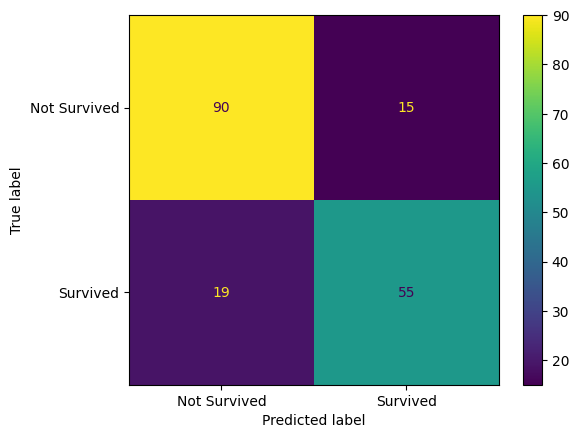

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot()
plt.show()


- The confusion matrix visualization helps interpret classification results.
- It highlights correct and incorrect predictions made by the model.

## Conclusion

- The Titanic dataset was successfully explored and understood through exploratory data analysis.
- Missing values were handled, and irrelevant features were removed during preprocessing.
- Categorical variables were encoded to make the data suitable for machine learning.
- A Logistic Regression model was trained on the cleaned dataset.
- Model evaluation using accuracy and confusion matrix showed reliable classification performance.
- The model correctly identified a majority of both survivors and non-survivors.
- This project demonstrates a complete end-to-end data cleaning and machine learning pipeline.
